# Data Mining Project

### Submission details: 
- Rotem Pinchover Shoob, 313245987
- Liraz Meir, 204292189
- Chen Avraham, 203446315

# General

#### Import libraries

In [1]:
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import confusion_matrix

#### Load external data

In [2]:
train = pd.DataFrame.from_csv(r'./train.csv', sep=',', index_col = None)
test = pd.DataFrame.from_csv(r'./test_no_target.csv', sep=',', index_col = None)
pass

# Data Exploration

#### Show how many observations we have from each class (in percentages, descending order)

In [3]:
train["target"].value_counts()/np.size(train["target"])

Class_2    0.259847
Class_6    0.229702
Class_8    0.135796
Class_3    0.129676
Class_9    0.080072
Class_7    0.044949
Class_4    0.044755
Class_5    0.044540
Class_1    0.030663
Name: target, dtype: float64

We can see that classes 2 and 6 are the most common.

#### Remove unuseful columns

In [4]:
value_list = ['Class_2','Class_6']
train = train[train.target.isin(value_list)]

#### Show values histogram for each feature

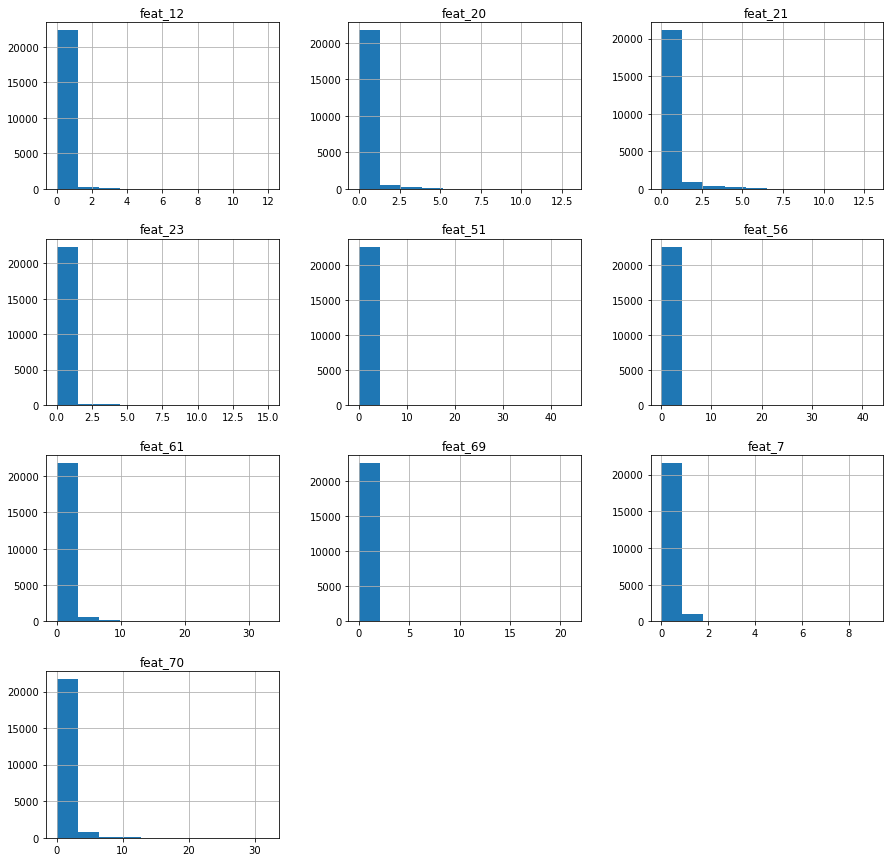

In [5]:
train.hist(figsize=[15,15])
plt.show()

pass

#### Show the features correlatoin matrix 

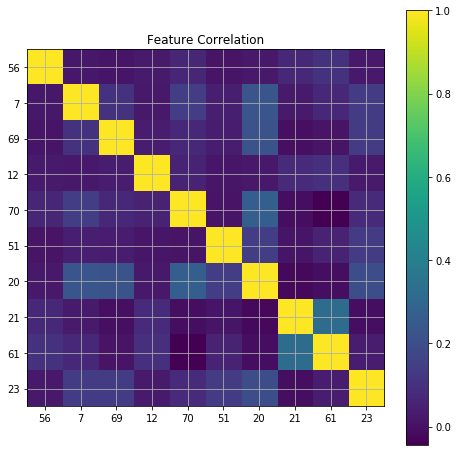

In [6]:
fig = plt.figure(figsize=[8,8])
ax1 = fig.add_subplot(111)
cax = ax1.imshow(train.corr(), interpolation="nearest")
ax1.grid(True)
plt.title('Feature Correlation')
labels=['56','7','69','12','70','51','20','21','61','23']
ax1.set_xticks(np.arange(len(labels)))
ax1.set_xticklabels(labels)
ax1.set_yticks(np.arange(len(labels)))
ax1.set_yticklabels(labels)
fig.colorbar(cax)
plt.show()
pass

#### Show the mean and std value for each feature and class combination

In [7]:
print "mean:"
mean_frame = train.groupby('target').mean()
print mean_frame

print ""
print ""

print "std:"
std_frame = train.groupby('target').std()
print std_frame

mean:
          feat_56    feat_7   feat_69   feat_12   feat_70   feat_51   feat_20  \
target                                                                          
Class_2  0.118915  0.020483  0.056555  0.091716  0.762584  0.002239  0.126710   
Class_6  0.243152  0.114728  0.183583  0.171482  0.584240  0.122420  0.345497   

          feat_21   feat_61   feat_23  
target                                 
Class_2  0.169085  0.012190  0.028609  
Class_6  0.461069  0.956473  0.137711  


std:
          feat_56    feat_7   feat_69   feat_12   feat_70   feat_51   feat_20  \
target                                                                          
Class_2  0.933050  0.177976  0.363064  0.337387  1.719298  0.059675  0.466171   
Class_6  0.740943  0.448145  0.771583  0.540553  1.358014  0.848570  0.904406   

          feat_21   feat_61   feat_23  
target                                 
Class_2  0.569606  0.131089  0.238716  
Class_6  1.074871  1.884253  0.627559  


#### Show the min and max value for each feature and class combination

In [8]:
print "min:"
min_frame = train.groupby('target').min()
print min_frame

print ""
print ""

print "max:"
max_frame = train.groupby('target').max()
print max_frame

min:
         feat_56  feat_7  feat_69  feat_12  feat_70  feat_51  feat_20  \
target                                                                  
Class_2        0       0        0        0        0        0        0   
Class_6        0       0        0        0        0        0        0   

         feat_21  feat_61  feat_23  
target                              
Class_2        0        0        0  
Class_6        0        0        0  


max:
         feat_56  feat_7  feat_69  feat_12  feat_70  feat_51  feat_20  \
target                                                                  
Class_2       42       9       17        5       32        3        9   
Class_6       20       9       21       12       25       44       13   

         feat_21  feat_61  feat_23  
target                              
Class_2        8        3        6  
Class_6       13       33       15  


#### Show statistical informartion about the features

In [9]:
data_summary_with_zeros = train.describe().loc[['mean', 'std', 'count', 'min','max']]
print data_summary_with_zeros

            feat_56        feat_7       feat_69       feat_12       feat_70  \
mean       0.177209      0.064704      0.116158      0.129143      0.678903   
std        0.850590      0.336531      0.594397      0.446203      1.562736   
count  22719.000000  22719.000000  22719.000000  22719.000000  22719.000000   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
max       42.000000      9.000000     21.000000     12.000000     32.000000   

            feat_51       feat_20       feat_21       feat_61       feat_23  
mean       0.058629      0.229367      0.306087      0.455258      0.079801  
std        0.585949      0.714869      0.857623      1.377320      0.466895  
count  22719.000000  22719.000000  22719.000000  22719.000000  22719.000000  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
max       44.000000     13.000000     13.000000     33.000000     15.000000  


#### Show statistical informartion about the features while ignoring zeros

In [10]:
train_no_zeros = train.replace(0, np.NaN)
data_summary = train_no_zeros.describe().loc[['mean', 'std', 'count', 'min','max']]
print data_summary

           feat_56       feat_7      feat_69      feat_12      feat_70  \
mean      1.606544     1.279373     1.587846     1.249574     2.179763   
std       2.065016     0.828142     1.579267     0.725619     2.137709   
count  2506.000000  1149.000000  1662.000000  2348.000000  7076.000000   
min       1.000000     1.000000     1.000000     1.000000     1.000000   
max      42.000000     9.000000    21.000000    12.000000    32.000000   

          feat_51      feat_20      feat_21      feat_61      feat_23  
mean     1.933237     1.541260     1.784450     2.678146     1.666360  
std      2.776283     1.188392     1.284577     2.281925     1.381934  
count  689.000000  3381.000000  3897.000000  3862.000000  1088.000000  
min      1.000000     1.000000     1.000000     1.000000     1.000000  
max     44.000000    13.000000    13.000000    33.000000    15.000000  


# Preprocessing

### Outlier removal

- Create the bias for each feature and class combination, in order to create the border for removing exceptional data
- Create the upper and the lower borders for each feature, for removing exceptional data
- Checking how much data we need to remove from database

In [11]:
def outlier_removal(data_s):
    borders_div_frame = data_s.loc['std'].multiply(4)
    mean_frame = data_s.loc['mean']
    print "Means:"
    print mean_frame
    print ""
    upper_borders_frame = mean_frame.add(borders_div_frame, fill_value=0)
    print "Upper borders:"
    print upper_borders_frame
    print ""
    lower_borders_frame = mean_frame.sub(borders_div_frame, fill_value=0)
    print "Lower borders:"
    print lower_borders_frame
    print ""
    count = 0
    for column in train.columns:
        for i in range(train.shape[0] - 1):
            cell_value = train.iloc[i][column]
            if column != 'target':
                upper_border = upper_borders_frame[column]
                if cell_value > upper_border :
                    without_exceptional_data = train.replace(train.iloc[i][column], np.NaN)
                    count += 1
    print "The number of exceptional data is:", count

#### For data with zeros:

In [12]:
outlier_removal(data_summary_with_zeros)

Means:
feat_56    0.177209
feat_7     0.064704
feat_69    0.116158
feat_12    0.129143
feat_70    0.678903
feat_51    0.058629
feat_20    0.229367
feat_21    0.306087
feat_61    0.455258
feat_23    0.079801
Name: mean, dtype: float64

Upper borders:
feat_56    3.579569
feat_7     1.410828
feat_69    2.493748
feat_12    1.913956
feat_70    6.929846
feat_51    2.402424
feat_20    3.088845
feat_21    3.736578
feat_61    5.964537
feat_23    1.947382
dtype: float64

Lower borders:
feat_56   -3.225152
feat_7    -1.281421
feat_69   -2.261431
feat_12   -1.655670
feat_70   -5.572039
feat_51   -2.285166
feat_20   -2.630110
feat_21   -3.124403
feat_61   -5.054021
feat_23   -1.787779
dtype: float64

The number of exceptional data is: 2582


#### For data without zeros:

In [13]:
outlier_removal(data_summary)

Means:
feat_56    1.606544
feat_7     1.279373
feat_69    1.587846
feat_12    1.249574
feat_70    2.179763
feat_51    1.933237
feat_20    1.541260
feat_21    1.784450
feat_61    2.678146
feat_23    1.666360
Name: mean, dtype: float64

Upper borders:
feat_56     9.866610
feat_7      4.591943
feat_69     7.904914
feat_12     4.152050
feat_70    10.730600
feat_51    13.038367
feat_20     6.294829
feat_21     6.922757
feat_61    11.805848
feat_23     7.194096
dtype: float64

Lower borders:
feat_56   -6.653521
feat_7    -2.033196
feat_69   -4.729222
feat_12   -1.652902
feat_70   -6.371075
feat_51   -9.171894
feat_20   -3.212309
feat_21   -3.353858
feat_61   -6.449556
feat_23   -3.861375
dtype: float64

The number of exceptional data is: 299


#### we can see that the original data has many outleirs, and we don't want to remove zeros, so we decided not to remove outleirs

### Reduce skewness using log

In [14]:
from scipy.stats import skew

skew of feature feat_56 before adaptation is: 19.9150317699
skew of feature feat_56 after adaptation is: 2.79583372328

skew of feature feat_7 before adaptation is: 9.24934021291
skew of feature feat_7 after adaptation is: 4.22619723708

skew of feature feat_69 before adaptation is: 11.7171877214
skew of feature feat_69 after adaptation is: 3.56268526154

skew of feature feat_12 before adaptation is: 6.30207361344
skew of feature feat_12 after adaptation is: 2.72866145486

skew of feature feat_70 before adaptation is: 5.17682982245
skew of feature feat_70 after adaptation is: 1.49814052952

skew of feature feat_51 before adaptation is: 34.0755325541
skew of feature feat_51 after adaptation is: 5.83000496404

skew of feature feat_20 before adaptation is: 5.6754470595
skew of feature feat_20 after adaptation is: 2.26064329745

skew of feature feat_21 before adaptation is: 4.24566428415
skew of feature feat_21 after adaptation is: 2.08294132831

skew of feature feat_61 before adaptation i

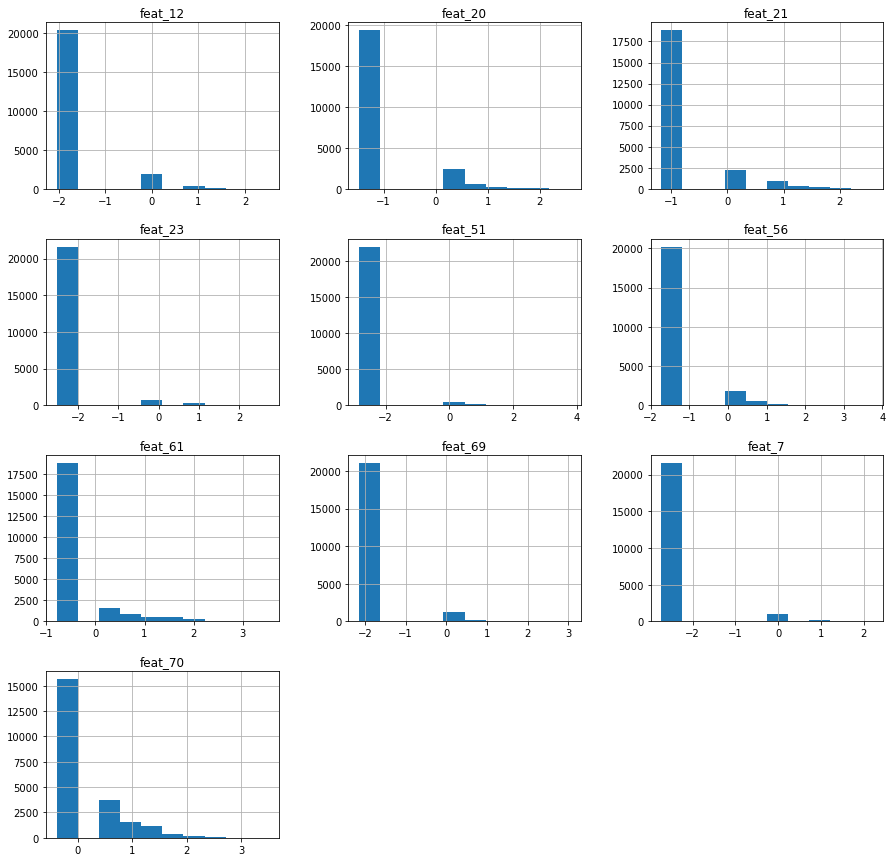

In [15]:
def skewness(data):
    mean_frame = data.describe().loc['mean']
    for feature in data:
        if feature != 'target':
            sk = skew(data[feature])
            print 'skew of feature', feature, 'before adaptation is:', sk
            data[feature] = (data[feature]+mean_frame.loc[feature]).apply(np.log)
            sk = skew(data[feature])
            print 'skew of feature', feature, 'after adaptation is:', sk
            print ""
    return data

train=skewness(train)
test=skewness(test)

train.hist(figsize=[15,15])
plt.show()

### Data normalization (using mean and variance)

In [16]:
def normalization(data,data_summary): 
    normal_data = (data-data.mean())/data.std()
    
    return normal_data

##### Normalize the train and test set

In [17]:
train_feat = pd.DataFrame(train).iloc[:,:-1]
target = pd.DataFrame(train).target
test = pd.DataFrame(test)

train_feat = normalization(train_feat,data_summary_with_zeros)
train = pd.concat([train_feat, target], axis=1)
test = normalization(test,data_summary_with_zeros)

##### Show the updated statistic information

In [18]:
train.describe().loc[['mean', 'std', 'count', 'min','max']]

,feat_56,feat_7,feat_69,feat_12,feat_70,feat_51,feat_20,feat_21,feat_61,feat_23
mean,7.135801e-13,1.852570e-12,-1.071683e-12,-6.853052e-14,2.258387e-15,1.114589e-12,5.403228e-13,4.289755e-13,1.883322e-13,1.418084e-12
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
count,2.271900e+04,2.271900e+04,2.271900e+04,2.271900e+04,2.271900e+04,2.271900e+04,2.271900e+04,2.271900e+04,2.271900e+04,2.271900e+04
min,-3.433620e-01,-2.290435e-01,-2.753412e-01,-3.360094e-01,-6.105162e-01,-1.738774e-01,-4.063166e-01,-4.376115e-01,-4.246296e-01,-2.209034e-01
max,7.613077e+00,7.370803e+00,7.523776e+00,6.081389e+00,5.296121e+00,1.149937e+01,5.351158e+00,4.927240e+00,5.748630e+00,8.047819e+00


#### Change Class_2 target value to "0" and Class_6 target value to "1"

In [19]:
train = train.replace('Class_2',0)
train = train.replace('Class_6',1)

# Feature Selection and Engineering 

### Random Forest - Choose the most influential features

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from matplotlib import pyplot

In [21]:
X = train.values[:,:-1]
y = train.values[:,-1]

In [22]:
clf = RandomForestClassifier(criterion='gini',
                            max_depth=3, max_features=None, max_leaf_nodes=None, min_impurity_split=1e-7,
                            min_samples_leaf=1, min_samples_split=2, n_estimators=100, warm_start=False)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

#### Show feature importance for each feature

In [23]:
feature_importance =clf.feature_importances_
print feature_importance
labels=['feat_56','feat_7','feat_69','feat_12','feat_70','feat_51','feat_20','feat_21','feat_61','feat_23']

[  2.36312907e-04   6.32341947e-04   5.29148788e-04   6.81053581e-06
   6.85376749e-03   7.37419240e-02   1.15831073e-01   3.05477147e-04
   7.96932529e-01   4.93061515e-03]


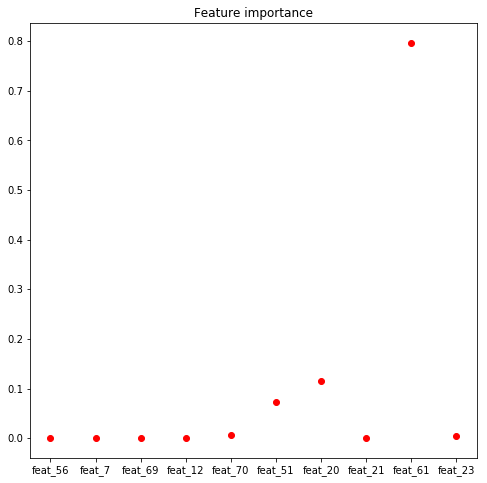

The importance of feat_56  is 0.000236312906916
The importance of feat_7  is 0.000632341947461
The importance of feat_69  is 0.000529148788254
The importance of feat_12  is 6.81053581386e-06
The importance of feat_70  is 0.00685376749406
The importance of feat_51  is 0.0737419240353
The importance of feat_20  is 0.115831073293
The importance of feat_21  is 0.000305477146844
The importance of feat_61  is 0.796932528707
The importance of feat_23  is 0.00493061514529


In [24]:
fig = plt.figure(figsize=[8,8])
ax = fig.add_subplot(111)
ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
plt.plot(feature_importance, 'ro')
plt.title('Feature importance')
plt.show()
j=0
for i in labels:
    print "The importance of",i," is",feature_importance[j]
    j+=1

We can see that the importance of feature 12 is negligible

#### Remove feature 12 data from our train set - 9 features left

In [25]:
train_after_feature_selection = train[['feat_56','feat_7','feat_69','feat_70','feat_51','feat_20','feat_21','feat_61','feat_23']]
X = train_after_feature_selection.values

##### Remove feature 12 data also from our test set (to match train's dimensions)

In [26]:
test = test[['feat_56','feat_7','feat_69','feat_70','feat_51','feat_20','feat_21','feat_61','feat_23']]

## PCA- Principal Component Analysis

In [27]:
from sklearn.decomposition import PCA

In [28]:
y = train.values[:,-1]

In [29]:
print "number of features before PCA is", X.shape[1]
pca = PCA(n_components=0.95)
pca.fit(X)
X = pca.transform(X)
print "number of features after PCA is", X.shape[1]

number of features before PCA is 9
number of features after PCA is 9


#### Show the explained variance ratio for each feature

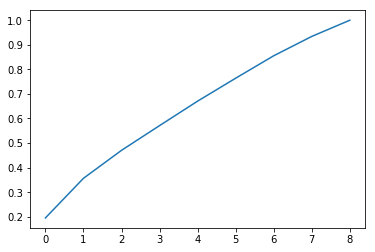

In [30]:
explained_variance_ratio = pca.explained_variance_ratio_
plt.plot(explained_variance_ratio.cumsum())
plt.show()

#### Calculate the influence of each feature in the PCA

In [31]:
print np.round(explained_variance_ratio, 2)
print ""
print "These are the influence of each feature in the PCA :"
print pca.components_

[ 0.2   0.16  0.11  0.1   0.1   0.09  0.09  0.08  0.07]

These are the influence of each feature in the PCA :
[[ 0.28674622  0.37334054  0.32673898  0.31704673  0.29477966  0.41330052
   0.26394951  0.33348316  0.36403809]
 [ 0.28566814 -0.12393193 -0.20262353 -0.30898025  0.00085293 -0.34771037
   0.55349578  0.55837898 -0.16571543]
 [-0.27643978 -0.10134325  0.18552003 -0.53957395  0.62598224 -0.1707991
  -0.13557286  0.02874133  0.38408424]
 [ 0.49898788 -0.47270042 -0.49132124  0.21261635  0.40097506  0.13104046
  -0.18424384 -0.12182044  0.11926659]
 [-0.45172087  0.43801902 -0.60531472  0.1494469   0.3683276   0.0943011
   0.11343788  0.06861396 -0.23068022]
 [ 0.39982574  0.59102839 -0.30045914 -0.27246473 -0.21221785 -0.24605982
  -0.32567071 -0.06459832  0.33240921]
 [-0.35478356 -0.22833443 -0.29398219  0.18329481 -0.34932534 -0.04655018
   0.24856686  0.06308936  0.71554778]
 [ 0.0179259   0.08345644  0.18237704  0.55136172  0.2267597  -0.76702761
   0.02977276 -0.11794284  

##### Reduce number of features of our test set (to match train's dimensions)

In [32]:
pca = PCA(n_components=X.shape[1])
pca.fit(test.values)
test = pca.transform(test.values)

#### Preparing data for the models

In [33]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2)

## Naive Bayes Classifier

In [34]:
from sklearn import neighbors, datasets

#### Fit model according to data

In [35]:
clf_naive_bayes =  GaussianNB(priors = None)
clf_naive_bayes.fit(X_train, y_train)

GaussianNB(priors=None)

#### Predict validation and check score

In [36]:
clf_naive_bayes.predict(X_validation)

array([ 1.,  0.,  0., ...,  1.,  0.,  1.])

In [37]:
print "Score for training set:", clf_naive_bayes.score(X_train, y_train)
print "Score for validation set:", clf_naive_bayes.score(X_validation, y_validation)

Score for training set: 0.694085281981
Score for validation set: 0.706866197183


#### Predict test

In [38]:
clf_naive_bayes.predict(test)

array([ 1.,  1.,  0., ...,  0.,  0.,  0.])

## Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston

#### Show statistical information before using the classifier

In [40]:
train['target'].value_counts()/np.size(train['target'])

0    0.530789
1    0.469211
Name: target, dtype: float64

In [41]:
train.groupby('target').mean()

,feat_56,feat_7,feat_69,feat_12,feat_70,feat_51,feat_20,feat_21,feat_61,feat_23
target,,,,,,,,,,
0,-0.140805,-0.150025,-0.122103,-0.083355,0.041456,-0.164777,-0.157205,-0.168712,-0.406421,-0.132749
1,0.159284,0.169714,0.138127,0.094294,-0.046897,0.186402,0.177837,0.190854,0.459759,0.150171


#### Fit model according to data

In [49]:
clf_logistic_regression = LogisticRegression(penalty="l2",dual=False, tol=1e-18, C=1, fit_intercept=True,
                                             intercept_scaling=1, class_weight=None, random_state=None,
                                             solver="liblinear", max_iter=100, multi_class="ovr", verbose=0,
                                             warm_start=False, n_jobs=1)

clf_logistic_regression.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=1e-18,
          verbose=0, warm_start=False)

#### Predict validation and check score

In [50]:
clf_logistic_regression.predict(X_validation)

array([ 1.,  0.,  0., ...,  1.,  1.,  1.])

In [51]:
print "Score for training set:", clf_logistic_regression.score(X_train, y_train)
print "Score for validation set:", clf_logistic_regression.score(X_validation, y_validation)

Score for training set: 0.737606602476
Score for validation set: 0.756161971831


#### Predict test

In [52]:
clf_logistic_regression.predict(test)

array([ 1.,  0.,  0., ...,  0.,  0.,  0.])

## Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

#### Fit model according to data

In [60]:
clf_decision_tree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10,
                                           min_samples_split=2, max_features=None, max_leaf_nodes=None,
                                           min_impurity_split=1e-7)

clf_decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

#### Predict validation and check score

In [61]:
clf_decision_tree.predict(X_validation)

array([ 1.,  0.,  0., ...,  1.,  1.,  1.])

In [62]:
print "Score for training set:", clf_decision_tree.score(X_train, y_train)
print "Score for validation set:", clf_decision_tree.score(X_validation, y_validation)

Score for training set: 0.755213204952
Score for validation set: 0.762764084507


#### Predict test

In [63]:
clf_decision_tree.predict(test)

array([ 1.,  1.,  0., ...,  0.,  0.,  0.])

## Neural Network

In [64]:
from sklearn.neural_network import MLPClassifier

#### Fit model according to data (using grid search to find hyper-parameters, and using scaled data)

In [69]:
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(X_train)
X_validation_scaled = preprocessing.scale(X_validation)

clf_NN = MLPClassifier(activation="relu", alpha = 0.0001, hidden_layer_sizes=(5,), batch_size = "auto", solver = "sgd", \
                       learning_rate = "adaptive", learning_rate_init = 0.1, power_t = 0.5, \
                       momentum = 0.9, nesterovs_momentum = False, early_stopping = False, \
                       tol = 1e-4, warm_start = False, max_iter = 500)

clf_NN.fit(X_train_scaled,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5,), learning_rate='adaptive',
       learning_rate_init=0.1, max_iter=500, momentum=0.9,
       nesterovs_momentum=False, power_t=0.5, random_state=None,
       shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

#### Predict validation and check score

In [70]:
clf_NN.predict(X_validation)

array([ 1.,  0.,  0., ...,  1.,  1.,  1.])

In [71]:
print "Score for training set:", clf_NN.score(X_train_scaled, y_train)
print "Score for validation set:", clf_NN.score(X_validation_scaled, y_validation)

Score for training set: 0.745034387895
Score for validation set: 0.758802816901


#### Predict test

In [72]:
clf_NN.predict(test)

array([ 1.,  1.,  0., ...,  0.,  0.,  0.])

# Data exploration

## Confusion Matrix, Thresholds, FPR, TPR for each model

In [73]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [74]:
from sklearn.model_selection import KFold

In [75]:
def clf_Confusion_Matrix(X_train, X_validation, y_train, y_validation, clf):
    predicted = clf.predict(X_validation).tolist()
    y_validation = y_validation.tolist()
    cnf =  confusion_matrix(y_validation, predicted)
    precision = 1.0*cnf[1,1]/(cnf[1,1]+cnf[0,1])
    recall = 1.0*cnf[1,1]/(cnf[1,1]+cnf[1,0])
    return cnf, precision, recall

def clf_ROC_train(X_train, y_train, clf):
    y_train_prob = clf.predict_proba(X_train)[:,1]
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)
    return fpr_train, tpr_train, thresholds_train

def clf_ROC_val(X_validation, y_validation, clf):
    y_val_prob = clf.predict_proba(X_validation)[:,1]
    fpr_val, tpr_val, thresholds_val = roc_curve(y_validation, y_val_prob)
    return fpr_val, tpr_val, thresholds_val

### Print desired indices & show ROC curves for all models : 

Naive Bayes KFold 1 :
confusion matrix:
[[1945  424]
 [ 939 1236]]
precision: 0.744578313253 , recall: 0.568275862069
AUC for training data: 0.731081858169
AUC for validation data: 0.736330960733

Naive Bayes KFold 2 :
confusion matrix:
[[1981  468]
 [ 944 1151]]
precision: 0.71093267449 , recall: 0.549403341289
AUC for training data: 0.734581577008
AUC for validation data: 0.722449472826

Naive Bayes KFold 3 :
confusion matrix:
[[1988  433]
 [ 919 1204]]
precision: 0.735491753207 , recall: 0.567121997174
AUC for training data: 0.730040066064
AUC for validation data: 0.740523967646

Naive Bayes KFold 4 :
confusion matrix:
[[1991  427]
 [ 957 1169]]
precision: 0.732456140351 , recall: 0.549858889934
AUC for training data: 0.732256438288
AUC for validation data: 0.731818802537

Naive Bayes KFold 5 :
confusion matrix:
[[1941  461]
 [ 920 1221]]
precision: 0.725921521998 , recall: 0.570294255021
AUC for training data: 0.73282263405
AUC for validation data: 0.729473064833

Naive Bayes - Ave

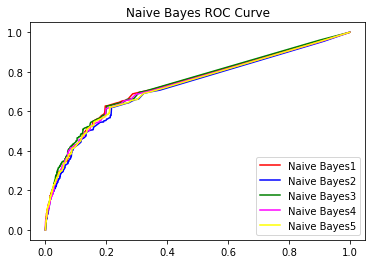

Logistic Regression KFold 1 :
confusion matrix:
[[2196  208]
 [ 967 1173]]
precision: 0.849384503983 , recall: 0.548130841121
AUC for training data: 0.775508949606
AUC for validation data: 0.775923985725

Logistic Regression KFold 2 :
confusion matrix:
[[2219  190]
 [ 974 1161]]
precision: 0.859363434493 , recall: 0.543793911007
AUC for training data: 0.774635357756
AUC for validation data: 0.77941919597

Logistic Regression KFold 3 :
confusion matrix:
[[2220  213]
 [ 955 1156]]
precision: 0.844411979547 , recall: 0.54760776883
AUC for training data: 0.77873786189
AUC for validation data: 0.762984507783

Logistic Regression KFold 4 :
confusion matrix:
[[2221  226]
 [ 931 1166]]
precision: 0.837643678161 , recall: 0.556032427277
AUC for training data: 0.773579025965
AUC for validation data: 0.783942031731

Logistic Regression KFold 5 :
confusion matrix:
[[2150  216]
 [ 997 1180]]
precision: 0.845272206304 , recall: 0.54203031695
AUC for training data: 0.775477718839
AUC for validation d

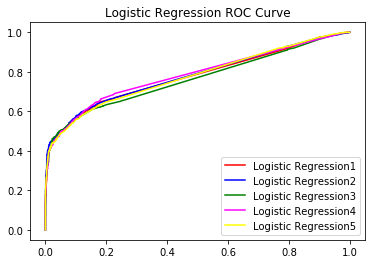

Decision Tree KFold 1 :
confusion matrix:
[[2214  202]
 [ 916 1212]]
precision: 0.857142857143 , recall: 0.56954887218
AUC for training data: 0.789431776785
AUC for validation data: 0.781629382593

Decision Tree KFold 2 :
confusion matrix:
[[2249  182]
 [ 906 1207]]
precision: 0.868970482361 , recall: 0.571225745386
AUC for training data: 0.787637265514
AUC for validation data: 0.788881019596

Decision Tree KFold 3 :
confusion matrix:
[[2192  177]
 [ 936 1239]]
precision: 0.875 , recall: 0.569655172414
AUC for training data: 0.787758674477
AUC for validation data: 0.788456839541

Decision Tree KFold 4 :
confusion matrix:
[[2215  188]
 [ 928 1213]]
precision: 0.865810135617 , recall: 0.566557683326
AUC for training data: 0.787518655604
AUC for validation data: 0.789428810282

Decision Tree KFold 5 :
confusion matrix:
[[2248  192]
 [ 900 1203]]
precision: 0.862365591398 , recall: 0.572039942939
AUC for training data: 0.787098296687
AUC for validation data: 0.790939953073

Decision Tree -

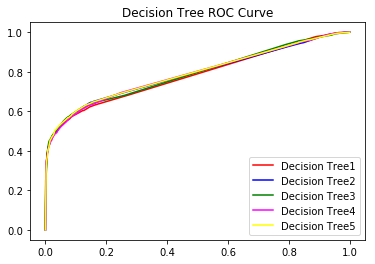

Neural Network KFold 1 :
confusion matrix:
[[2053  323]
 [ 856 1312]]
precision: 0.80244648318 , recall: 0.605166051661
AUC for training data: 0.777668117964
AUC for validation data: 0.77009903385

Neural Network KFold 2 :
confusion matrix:
[[2082  342]
 [ 855 1265]]
precision: 0.787181082763 , recall: 0.596698113208
AUC for training data: 0.778887399448
AUC for validation data: 0.765252253409

Neural Network KFold 3 :
confusion matrix:
[[2012  345]
 [ 859 1328]]
precision: 0.793783622236 , recall: 0.607224508459
AUC for training data: 0.77633794524
AUC for validation data: 0.775272423017

Neural Network KFold 4 :
confusion matrix:
[[2135  301]
 [ 756 1352]]
precision: 0.817906836056 , recall: 0.641366223909
AUC for training data: 0.771443183509
AUC for validation data: 0.794895919992

Neural Network KFold 5 :
confusion matrix:
[[2103  363]
 [ 807 1270]]
precision: 0.777709736681 , recall: 0.611458834858
AUC for training data: 0.776443010803
AUC for validation data: 0.775093217688

Neu

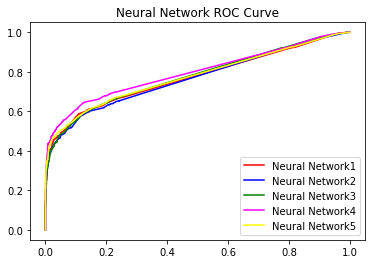

In [76]:
kfold = KFold(5, shuffle = True)
colors=["red", "blue", "green", "fuchsia", "yellow"]
best_clf = ""
best_clf_model = 0
max_avg_auc = 0
for clf in [[clf_naive_bayes,"Naive Bayes"] ,[clf_logistic_regression, "Logistic Regression"], \
                [clf_decision_tree, "Decision Tree"], [clf_NN, "Neural Network"]]:
    i=0
    auc_train_list = []
    auc_val_list = []
    for train_index, validation_index in kfold.split(X):
        X_train, X_validation, y_train, y_validation = X[train_index] , X[validation_index] , y[train_index] , y[validation_index] 
        cfm, precision, recall = clf_Confusion_Matrix(X_train, X_validation, y_train, y_validation, clf[0])
        fpr_train, tpr_train, thresholds_train = clf_ROC_train(X_train, y_train, clf[0])
        fpr_val, tpr_val, thresholds_val = clf_ROC_val(X_validation, y_validation, clf[0])
        print clf[1], "KFold", str(i+1), ":"
        print "confusion matrix:"
        print cfm
        print "precision:", precision, ", recall:", recall
        print "AUC for training data:", auc(fpr_train, tpr_train)
        auc_train_list.append(auc(fpr_train, tpr_train))
        print "AUC for validation data:", auc(fpr_val, tpr_val)
        auc_val_list.append(auc(fpr_val, tpr_val))
        print ""
        plt.plot(fpr_val, tpr_val, color=colors[i], label=str(clf[1]+str(i+1)))
        i=i+1
    avg_auc_train = sum(auc_train_list) / float(len(auc_train_list)) 
    print clf[1], "- Average AUC for training data:", avg_auc_train
    avg_auc_val = sum(auc_val_list) / float(len(auc_val_list)) 
    print clf[1], "- Average AUC for validation data:", avg_auc_val
    if avg_auc_val > max_avg_auc:
        max_avg_auc = avg_auc_val
        best_clf = clf[1]
        best_clf_model = clf[0]
    plt.legend()
    plt.title(clf[1] + " ROC Curve")
    plt.show()

In [77]:
print "Best classifier is:", best_clf
print "Best AUC value:", max_avg_auc

Best classifier is: Decision Tree
Best AUC value: 0.787867201017


#### Create a CSV file that includes the probability vector for all samples in our test set (presents the probability for Class 2)

In [78]:
results_test = best_clf_model.predict_proba(test)[:,0]
np.savetxt("Submission_8.csv", results_test, fmt="%10.5f", delimiter=",", header="prediction", comments="")